In [ ]:
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [7]:
n = 5000
with open("../similarity_jak2.pkl", "rb") as file:
    similarity_matrix = pickle.load(file)
print(similarity_matrix.shape)
similarity_matrix = 1 - similarity_matrix
similarity_triangle = similarity_matrix[np.triu_indices(n=n, k=1)]

(50000, 50000)


In [8]:
def plot_distances(x_distance, y_distance, emb_name, dist_name, n_bins=50):
    ax = sns.jointplot(
        x=similarity_triangle, 
        y=distance_triangle, 
        marginal_kws={"color": "#6ec1d0", "edgecolor": "white", "bins": n_bins}, 
        color="#6ec1d0",
        kind="hex",
        bins=n_bins/2
    )
    
    plt.xlabel("Tanimoto distance on Morgan2 fingerprints\n")
    plt.ylabel(f"{dist_name.capitalize()} distance on {emb_name} embedding")
    
    plt.tight_layout()
    plt.savefig(f"jointplot_10000_{emb_name}_{dist_name}_jak2.png", bbox_inches='tight')
    plt.show()

In [9]:
embedding_list = [
    ("cddd", "CDDD", "euclidean"),
    ("cddd", "CDDD", "cosine"),
    ("molformer", "MolFormer", "euclidean"),
    ("molformer", "MolFormer", "cosine"),
    ("macaw", "MACAW", "cosine"),
    ("mol2vec", "Mol2vec", "cosine"),
    
]

(5000, 5000)


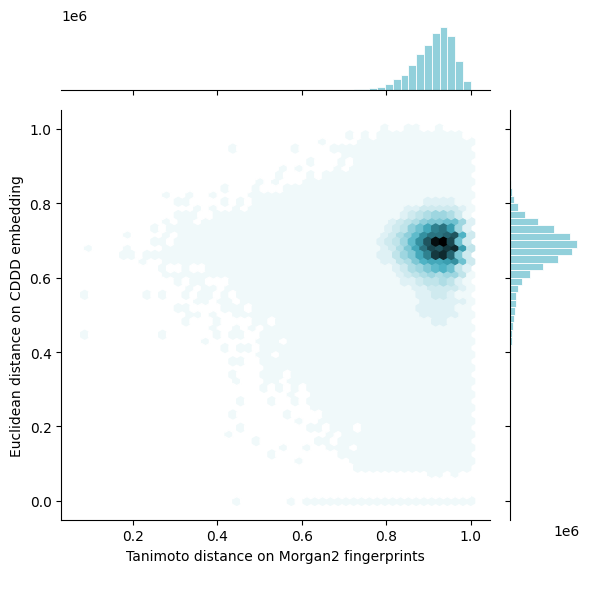

(5000, 5000)


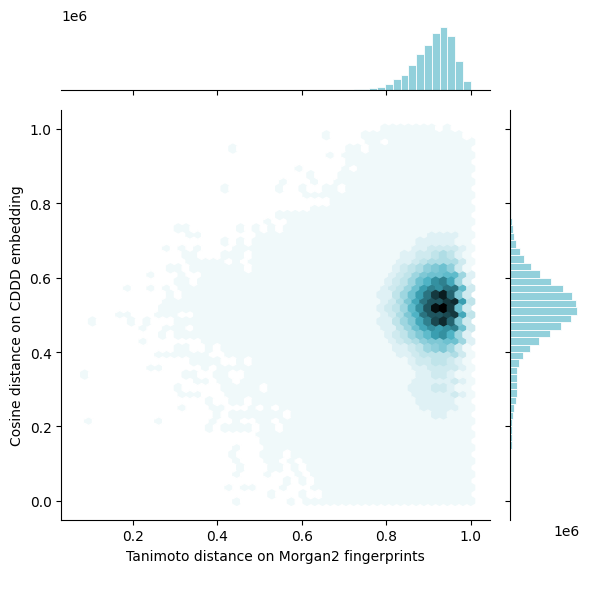

(5000, 5000)


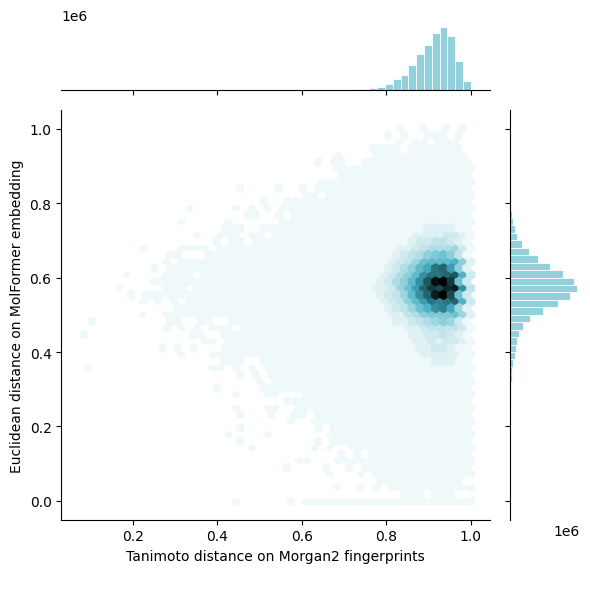

(5000, 5000)


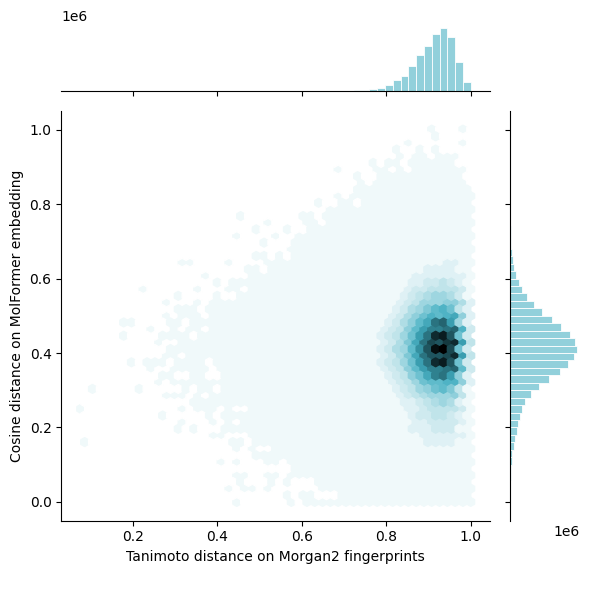

(5000, 5000)


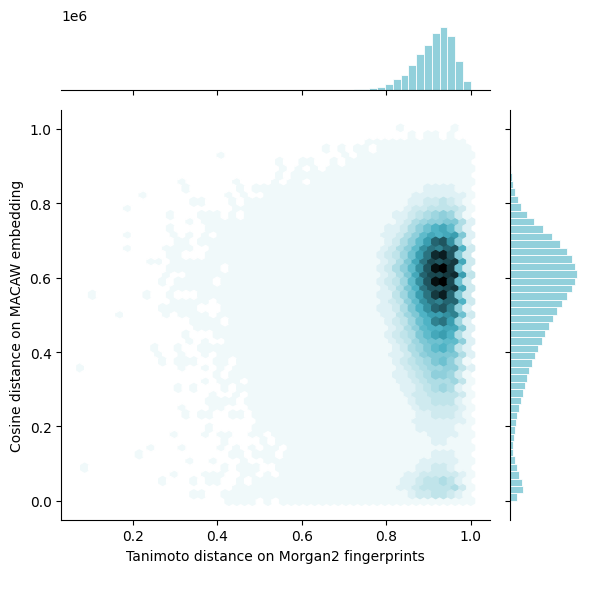

(5000, 5000)


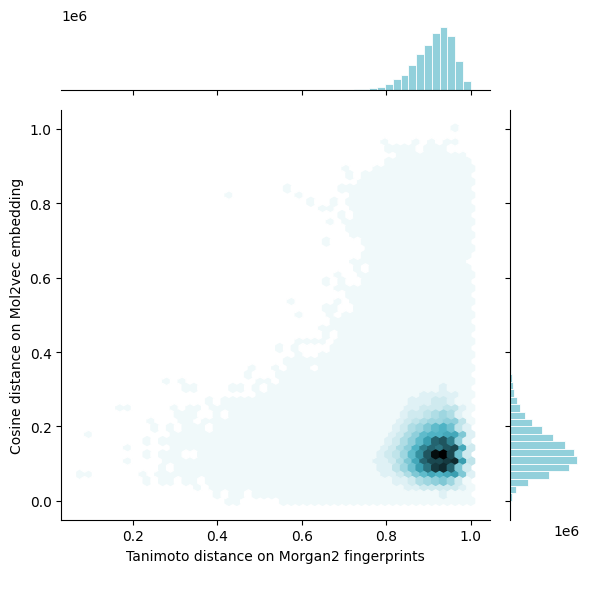

In [10]:
for emb_name, emb_name_repr, dist_name in embedding_list:
    with open(f"../distance_jak2/distance_{emb_name}_{dist_name}.pkl", "rb") as file:
        distance_matrix = pickle.load(file)
    print(distance_matrix.shape)
    distance_matrix = (distance_matrix - np.min(distance_matrix)) / (np.max(distance_matrix) - np.min(distance_matrix))
    distance_triangle = distance_matrix[np.triu_indices(n=n, k=1)]
    plot_distances(x_distance=similarity_triangle, y_distance=distance_triangle, emb_name=emb_name_repr, dist_name=dist_name)